In [1]:
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/titanic.csv', index_col=0)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [3]:
df.pivot_table(index='Sex', columns='Survived', aggfunc={'Survived':len}, fill_value=0)

Survived     
Survived        0    1
Sex                   
female         81  233
male          468  109

<Axes: xlabel='Sex'>

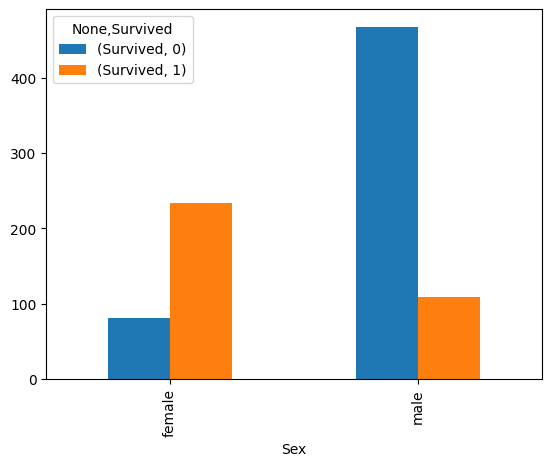

In [4]:
df.pivot_table(index='Sex', columns='Survived', aggfunc={'Survived':len}, fill_value=0).plot(kind='bar')

In [5]:
df.pivot_table(index='Pclass', columns='Survived', aggfunc={'Survived':len}, fill_value=0)

Survived     
Survived        0    1
Pclass                
1              80  136
2              97   87
3             372  119

<Axes: xlabel='Pclass'>

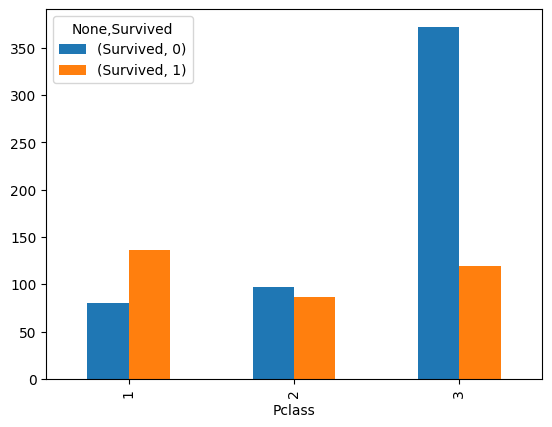

In [6]:
df.pivot_table(index='Pclass', columns='Survived', aggfunc={'Survived':len}, fill_value=0).plot(kind='bar')

In [7]:
df.pivot_table(index='Parch', columns='Survived', aggfunc={'Survived':len}, fill_value=0)

Survived     
Survived        0    1
Parch                 
0             445  233
1              53   65
2              40   40
3               2    3
4               4    0
5               4    1
6               1    0

<Axes: xlabel='Parch'>

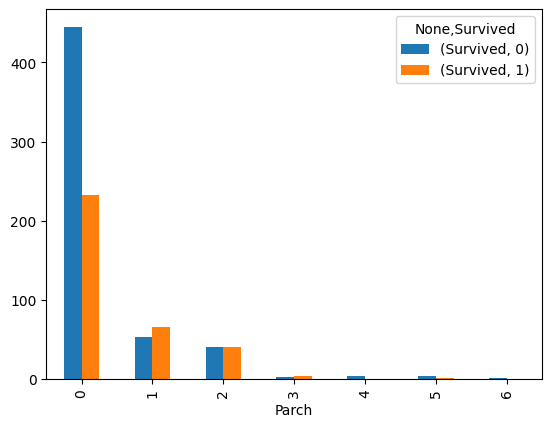

In [8]:
df.pivot_table(index='Parch', columns='Survived', aggfunc={'Survived':len}, fill_value=0).plot(kind='bar')

In [9]:
# To analyse survivability by age, we need to discretize the age variable
# But age contains some missing values, so we need to drop them first
df.dropna(subset=['Age'], inplace=True)
df.reset_index(inplace=True)

In [10]:
df['AgeGroup'] = ''

for i in range(len(df.index)):
    
    if df.loc[i, 'Age'] < 13:
        
        df.loc[i, 'AgeGroup'] = 'Child'
    
    elif df.loc[i, 'Age'] < 21:
        
        df.loc[i, 'AgeGroup'] = 'Teenager'
    
    elif df.loc[i, 'Age'] < 65:
        
        df.loc[i, 'AgeGroup'] = 'Adult'
    
    else:
        
        df.loc[i, 'AgeGroup'] = 'Eldery'

In [11]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q,Adult
710,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Adult
711,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Teenager
712,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Adult


In [12]:
df.pivot_table(index='AgeGroup', columns='Survived', aggfunc={'Survived':len}, fill_value=0)

Survived     
Survived        0    1
AgeGroup              
Adult         316  207
Child          29   40
Eldery         10    1
Teenager       69   42

<Axes: xlabel='AgeGroup'>

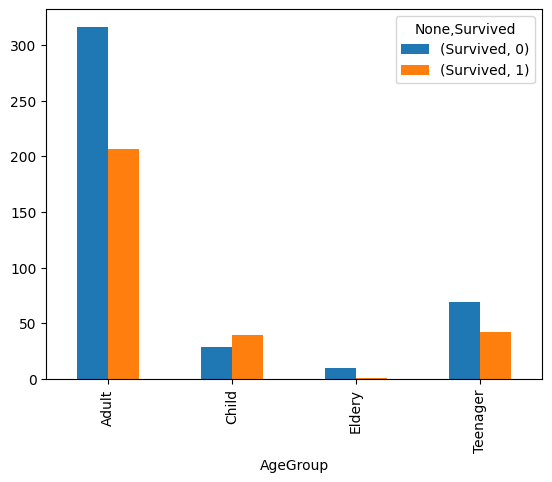

In [13]:
df.pivot_table(index='AgeGroup', columns='Survived', aggfunc={'Survived':len}, fill_value=0).plot(kind='bar')